# Cardiovascular diseases

In [27]:
%%capture
!pip install numpy pandas matplotlib seaborn scikit-learn plotly
!pip install --upgrade nbformat

In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [29]:
heart = pd.read_csv(r"C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\heart.csv", index_col=None, na_values=['nan'],)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
print(heart.shape)
print(heart.dtypes)

(918, 12)
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [31]:
# Check for null values
for col in heart.columns:
    print(col, heart[col].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


In [32]:
string_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
not_string_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
heart[string_col] = heart[string_col].astype('string')
heart[not_string_col] = heart[not_string_col].astype('float64')
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [33]:
# There is one record with RestingBP = 0, which is impossible. 
# We should change it to nan and then impute it later.
heart['RestingBP'] = heart['RestingBP'].replace(0, np.nan)

In [34]:
heart[heart['Cholesterol'] == 0].shape
# There are a lot of records with Cholesterol = 0, which is impossible too.
heart['Cholesterol'] = heart['Cholesterol'].replace(0, np.nan)

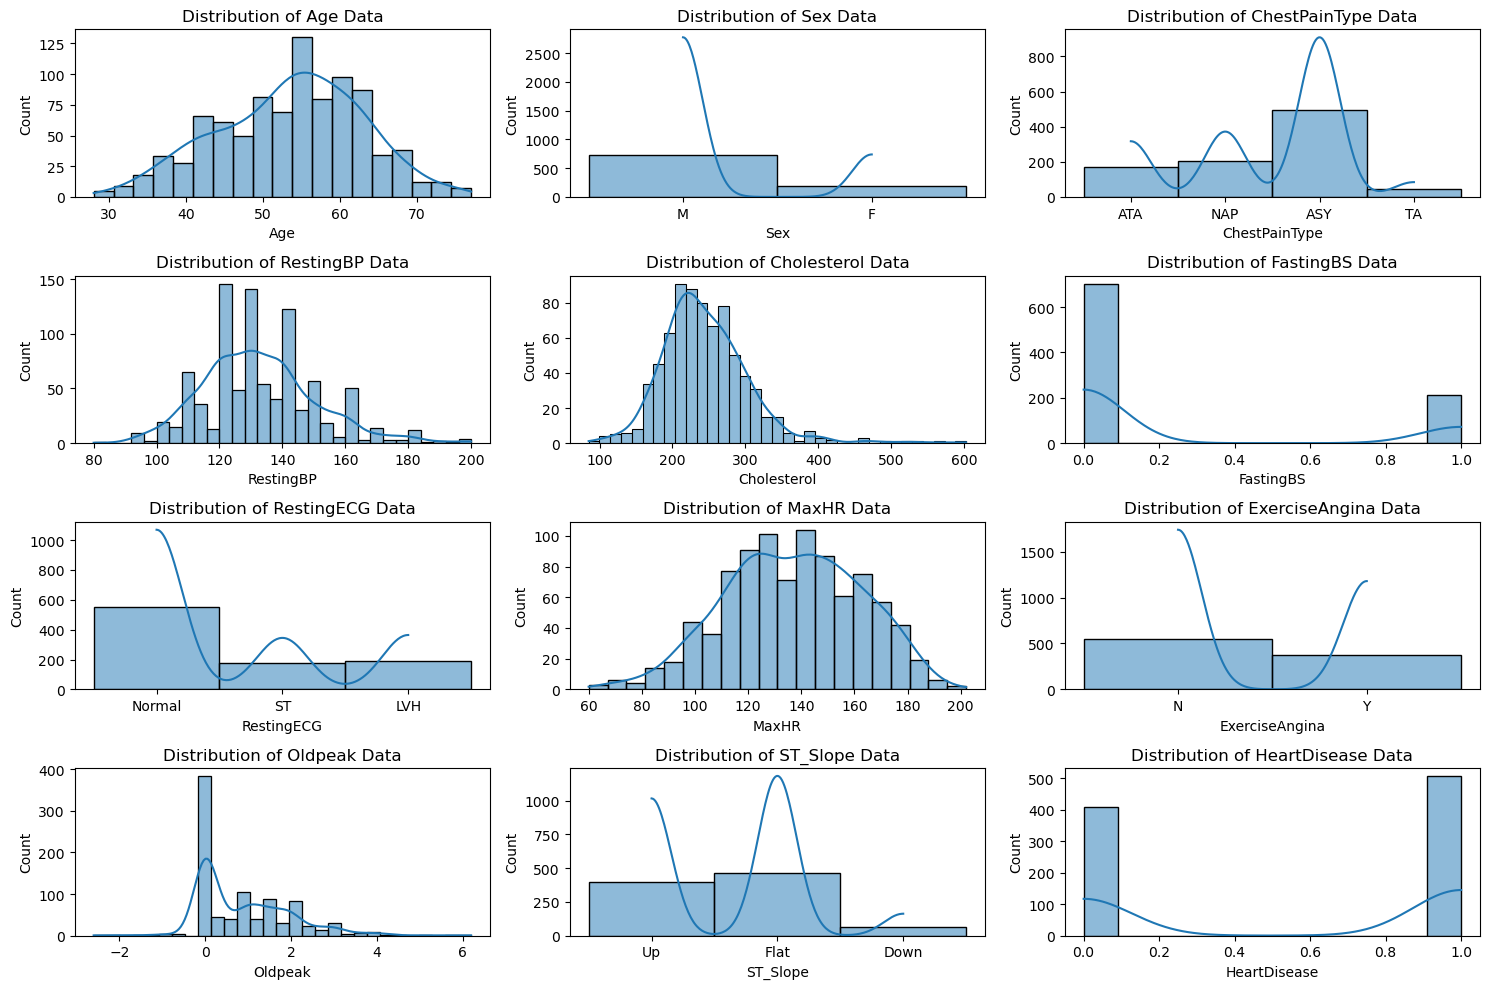

In [35]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

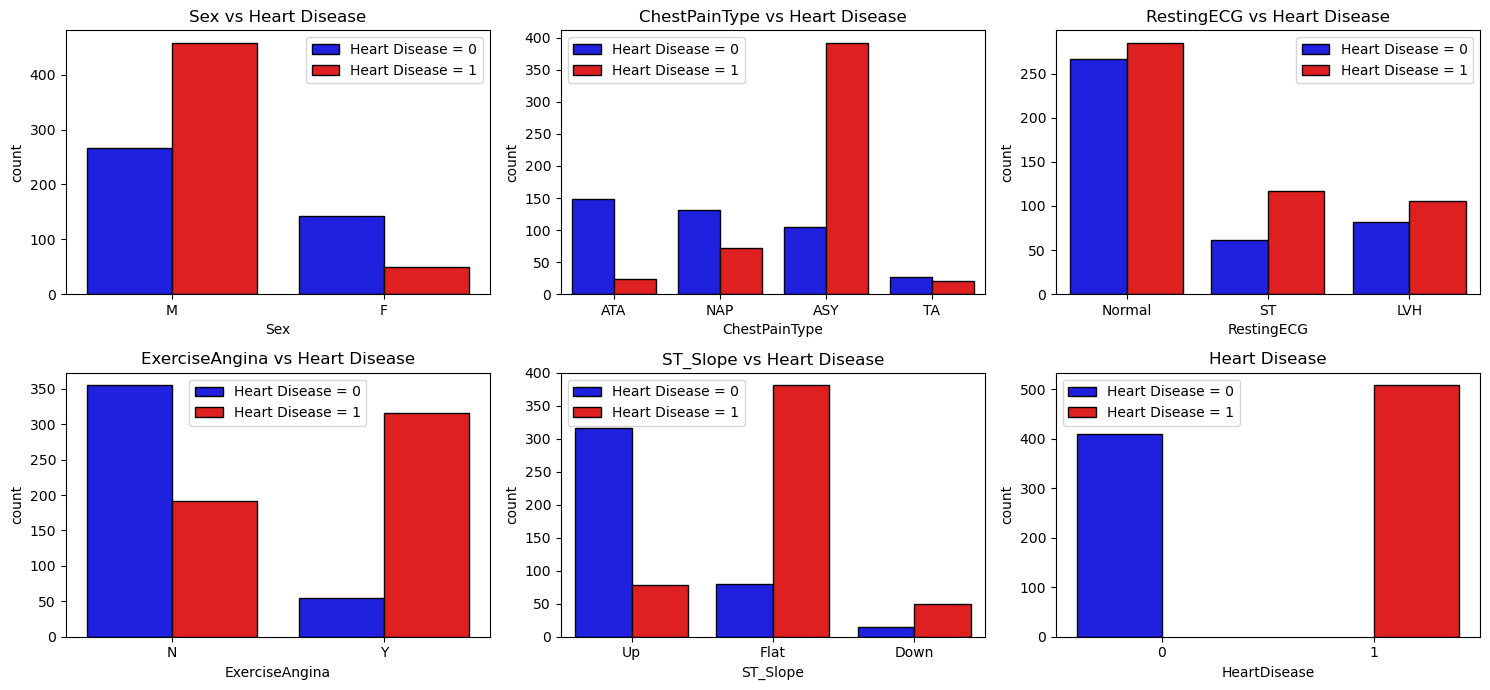

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

# For categorical variables
for i, col in enumerate(heart[string_col].columns):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col} vs Heart Disease")
    sns.countplot(x=col, data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
    plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
    plt.tight_layout()

plt.subplot(2, 3, 6)
plt.title("Heart Disease")
sns.countplot(x='HeartDisease', data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
plt.tight_layout()

plt.show()

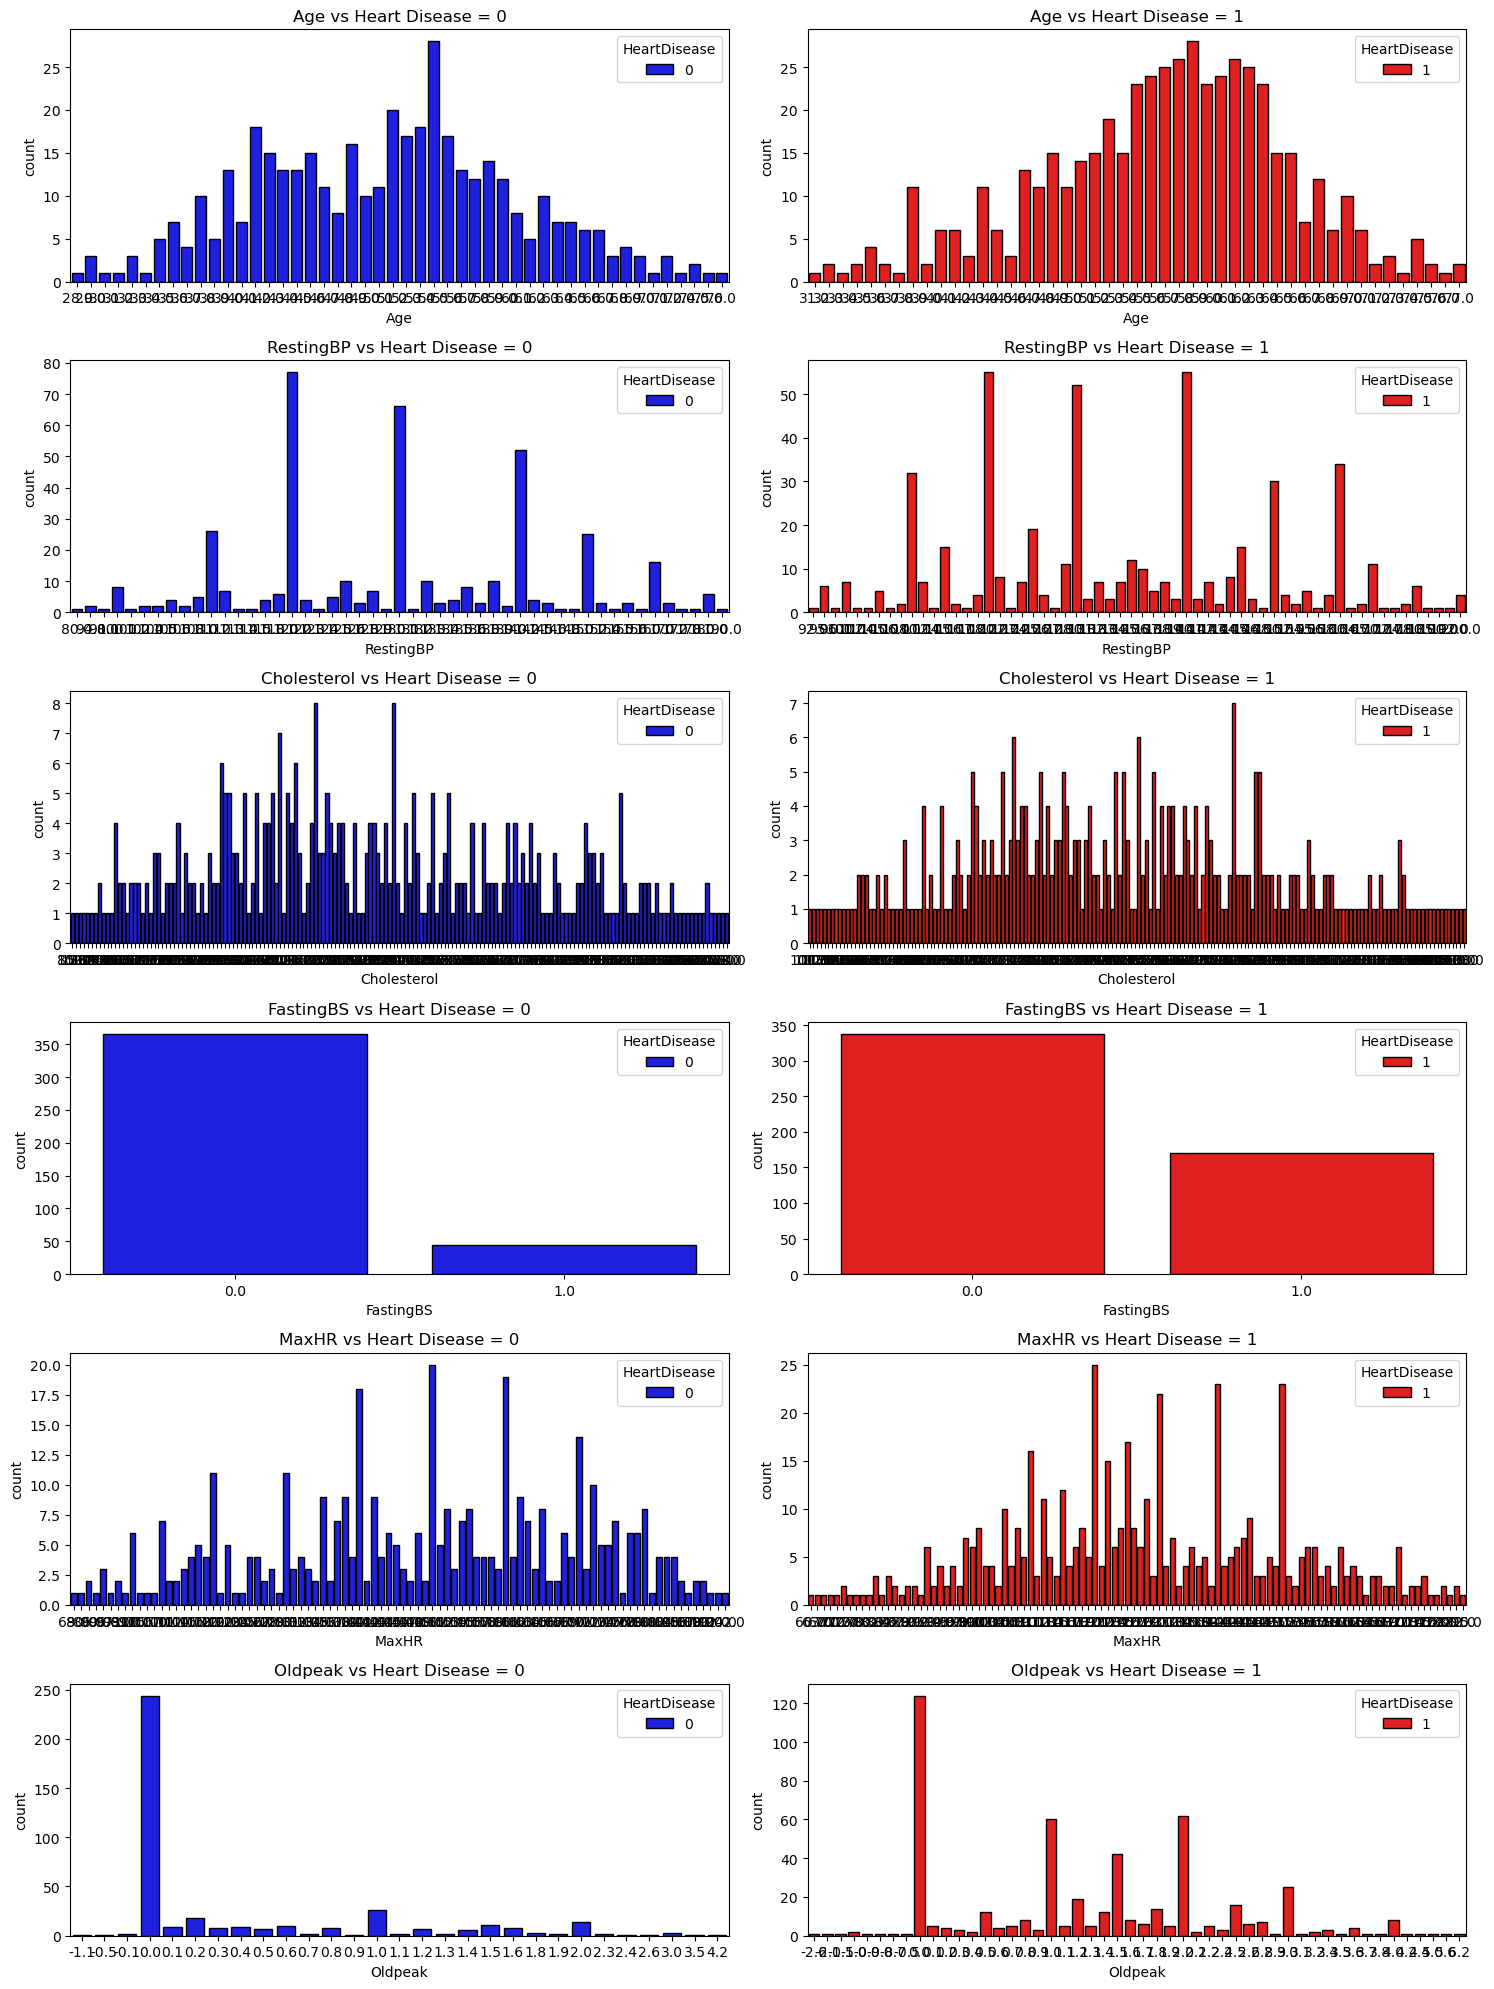

In [37]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# For numerical variables
numerical_cols = heart[not_string_col].columns
num_rows, num_cols = ax.shape

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i*2 + 1)
    plt.title(f"{col} vs Heart Disease = 0")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 0], hue="HeartDisease", palette=["blue"], edgecolor='black')
    
    plt.subplot(num_rows, num_cols, i*2 + 2)
    plt.title(f"{col} vs Heart Disease = 1")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 1], hue="HeartDisease", palette=["red"], edgecolor='black')

plt.tight_layout()
plt.show()


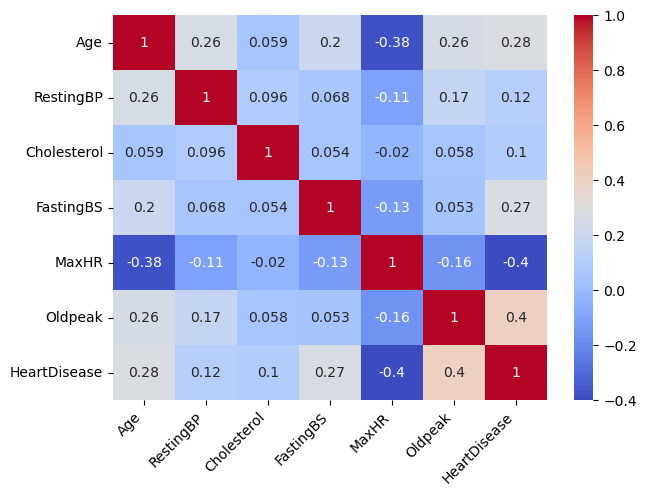

In [38]:
corr = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(heart[corr].corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [39]:
#unique values in each categorical column
for col in string_col:
    print(f"{col} has {heart[col].nunique()} unique values: {heart[col].unique()}")
    print("")

Sex has 2 unique values: <StringArray>
['M', 'F']
Length: 2, dtype: string

ChestPainType has 4 unique values: <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string

RestingECG has 3 unique values: <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string

ExerciseAngina has 2 unique values: <StringArray>
['N', 'Y']
Length: 2, dtype: string

ST_Slope has 3 unique values: <StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string



In [40]:
#Label Encoding for categorical columns with 2 unique values
le = preprocessing.LabelEncoder()
col_2v = ['Sex', 'ExerciseAngina']
for col in col_2v:
    heart[col] = le.fit_transform(heart[col])

In [41]:
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

We have 2 options for data scaling : 
- 1) Normalization 
- 2) Standardization 

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
- Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
- Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

In [42]:
# Scale the Oldpeak feature using MinMaxScaler
heart['Oldpeak'] = minmax_scaler.fit_transform(heart[['Oldpeak']])

# Scale the rest of the numerical features using StandardScaler
for col in not_string_col:
    if col != 'Oldpeak' and col != 'Age':
        heart[col] = standard_scaler.fit_transform(heart[[col]])

In [43]:
heart_tree = heart.copy()

For NON-TREE BASED ALGORITHMS:

In [44]:
# One-hot encoding for categorical columns with more than 2 unique values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
heart = np.array(ct.fit_transform(heart))

In [45]:
# KNN imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
heart = imputer.fit_transform(heart)

In [46]:
feature = heart[:, :-1]
target = heart[:, -1]

In [47]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=918*12)

For TREE BASED ALGORITHMS:

In [48]:
#Label Encoding for other categorical columns
le = preprocessing.LabelEncoder()
col_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
for col in col_name:
    heart_tree[col] = le.fit_transform(heart_tree[col])

In [49]:
# Specify the columns to exclude from imputation
exclude_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Perform imputation on the remaining columns
heart_tree_imputed = imputer.fit_transform(heart_tree.drop(exclude_columns, axis=1))

# Create a dataframe of the imputed columns
heart_tree_imputed = pd.DataFrame(heart_tree_imputed, columns=heart_tree.drop(exclude_columns, axis=1).columns)

# Concatenate the imputed columns with the excluded columns
heart_tree_imputed = pd.concat([heart_tree_imputed, heart_tree[exclude_columns]], axis=1)

In [50]:
#feature and target
target_tree = heart_tree_imputed['HeartDisease']
feature_tree = heart_tree_imputed.drop('HeartDisease', axis=1)

In [51]:
#splitting the data into training and testing
feature_train_tree, feature_test_tree, target_train_tree, target_test_tree = train_test_split(feature_tree, target_tree, 
                                                                                              test_size=0.25, random_state=918*12)

Modeling

Base Accuracy: 86.957%
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Randomized Search Accuracy: 87.83%
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Grid Search Accuracy: 87.83%


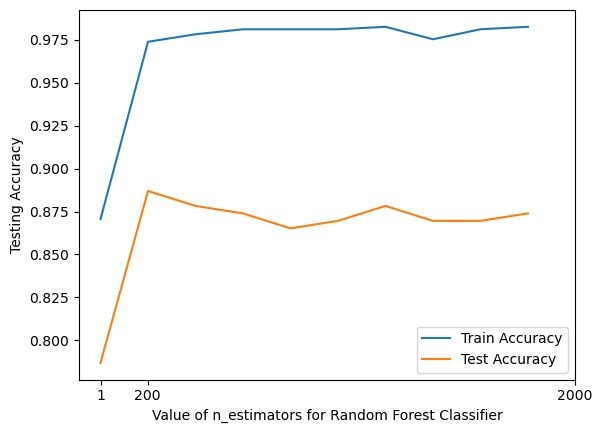

RandomForestClassifier
Training Score:  0.9825581395348837
Testing Score:  0.8739130434782608
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        94
         1.0       0.90      0.89      0.89       136

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



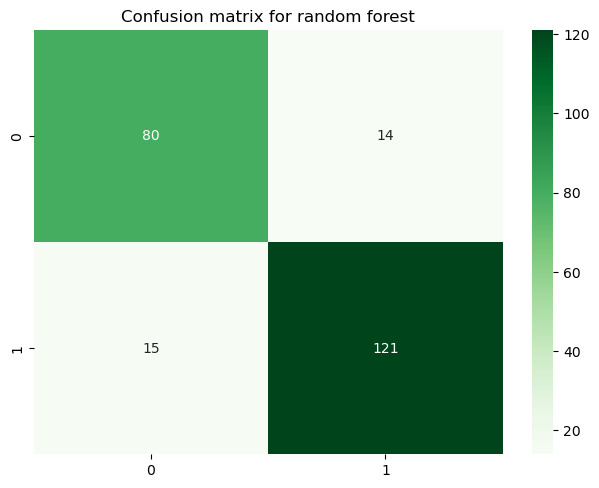

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a base model
model = RandomForestClassifier()

# Train the base model
model.fit(feature_train_tree, target_train_tree)
base_accuracy = model.score(feature_test_tree, target_test_tree)
print("Base Accuracy: %.3f%%" % (base_accuracy * 100.0))

# Define hyperparameter grids
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform randomized search to find best hyperparameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                               n_iter=100, scoring='neg_mean_absolute_error',
                               cv=5, verbose=2, random_state=42, n_jobs=-1,
                               return_train_score=True)
rf_random.fit(feature_train_tree, target_train_tree)

# Evaluate the best model from randomized search
best_random = rf_random.best_estimator_
random_accuracy = metrics.accuracy_score(target_test_tree, best_random.predict(feature_test_tree))
print("Randomized Search Accuracy: %.2f%%" % (random_accuracy * 100))

# Extract top 5 parameter combinations from randomized search
cv_results = rf_random.cv_results_
sorted_indices = np.argsort(cv_results['mean_test_score'])[::-1]
top_5_params = [cv_results['params'][index] for index in sorted_indices[:5]]

# Extract unique values for each hyperparameter in the top 5 parameter combinations
param_values = {}
for param in random_grid:
    param_values[param] = set()

for params in top_5_params:
    for param in random_grid:
        param_values[param].add(params[param])

# Convert sets to lists for grid search
for param in param_values:
    param_values[param] = list(param_values[param])

# Create a new grid for grid search using unique parameter values
param_grid = param_values

# Perform grid search using the new grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(feature_train_tree, target_train_tree)

# Evaluate the best model from grid search
best_grid = grid_search.best_estimator_
grid_accuracy = metrics.accuracy_score(target_test_tree, best_grid.predict(feature_test_tree))
print("Grid Search Accuracy: %.2f%%" % (grid_accuracy * 100))

# Create the best model using the best parameters from grid search
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)

# Evaluate the best model using cross-validation
randomForest_result = cross_val_score(best_model, feature_train_tree, target_train_tree, cv=5)
train_accuracy = []
test_accuracy = []

# Vary n_estimators to plot the learning curve
for n_estimator in range(1, 2000, 200):
    best_model.set_params(n_estimators=n_estimator)
    best_model.fit(feature_train_tree, target_train_tree)
    train_prediction = best_model.predict(feature_train_tree)
    train_accuracy.append(accuracy_score(target_train_tree, train_prediction))
    test_prediction = best_model.predict(feature_test_tree)
    test_accuracy.append(accuracy_score(target_test_tree, test_prediction))

# Plot the learning curve
plt.plot(range(1, 2000, 200), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 2000, 200), test_accuracy, label='Test Accuracy')
plt.xticks((1, 2000, 200))
plt.xlabel("Value of n_estimators for Random Forest Classifier")
plt.ylabel("Testing Accuracy")
plt.legend()
plt.show()

# Print evaluation metrics and results
print("RandomForestClassifier")
train_score = best_model.score(feature_train_tree, target_train_tree)
print('Training Score: ', train_score)
test_score = best_model.score(feature_test_tree, target_test_tree)
print('Testing Score: ', test_score)
target_prediction = best_model.predict(feature_test_tree)
print(classification_report(target_test_tree, target_prediction))

# Plot confusion matrix
confusion_matrix = confusion_matrix(target_test_tree, target_prediction)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Greens', fmt='g')
plt.tight_layout()
plt.title("Confusion matrix for random forest")
plt.show()
